<h1><center><font size=10>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Supervised Learning - Week-3 </center></h1>

<center><img src="https://img.freepik.com/free-photo/axis-cnc-mills-machines-design-configuration-that-utilizes-swivel-head-machine-table-flush-with-surface-metalworking-industrial_67340-733.jpg?w=996" width="800" height="500"></center>

<h1><center></center></h1>
<h1><center>Machine Failure Prediction </center></h1>

## Problem Statement

### Business Context

System failure is a common issue across the manufacturing industry, where a variety of machines and equipment are used. In most cases, it becomes important to be able to predict machine failures by analyzing system data and taking preventive measures to be able to tackle them. This is known as predictive maintenance and with the rising availability of data and computational resources, the use of such data-driven, proactive maintenance methods has resulted in several benefits like minimized downtime of the equipment, minimized cost associated with spares and supplies, etc.

AutoMobi Engineering Pvt. Ltd is an auto component manufacturing company. The manufacturing facility of AutoMobi consists of numerous products machined on several CNC (Computer Numerical Controlled) machines. In an attempt to transition to a data-driven maintenance process, the company had set up sensors in various locations to collect data regarding the various parameters involved in the manufacturing process. Initially, they want to try it in an injector nozzle manufacturing shop where they are manufacturing fuel injector nozzles for automobile engines using various manufacturing processes (like turning, drilling, etc). The company has been collecting data on an hourly basis from these sensors and aims to build ML-based solutions using the data to optimize cost, improve failure predictability, and minimize the downtime of equipment.

### Objective

AutoMobi has recently been encountering a problem with frequent equipment failure in the fuel injector nozzle manufacture unit, leading to disturbance in the manufacturing process. They have reached out to the Data Science team for a solution and shared data for the past three months. As a member of the Data Science team, you are tasked with analyzing the data and developing a Machine Learning model to detect potential machine failures, determine the most influencing factors on machine health, and provide recommendations for cost optimization to the management.

### Data Description

The data contains the different attributes of machines and health. The detailed data dictionary is given below.

**Data Dictionary**

* UDI: Unique identifier ranging from 1 to 10000
* Type: The type of product consisting of low(60% of all products), medium(30%), and high(10%) quality corresponding to L, M, and H
* Air temperature: Ambient temperature (in the machine shop) measured in Kelvin
* Process Temperature: Tool tip temperature measured in Kelvin
* Rotational Speed: Rotational speed of the machine spindle measured in revolutions per minute (rpm)
* Torque: Torque acting on the machine spindle measured in Newton meter (Nm)
* Tool wear: Tool wear measured in micrometers (During the manufacturing process, continuous rubbing of the tool on the workpiece leads to the wearing of the tool material. The tool wear is measured as the amount of wear on the cutting face of the tool measured in micrometers)
* Failure: 0-No failure, 1-Failure

## Importing the necessary libraries

In [3]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# Library for scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# To build model for prediction
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/Python Course/'

Mounted at /content/drive


In [5]:
# loading the dataset
df_main = pd.read_csv(f"{path}/Predictive_Maintenance_Case_Study.csv")

In [6]:
# copying data to another variable to avoid any changes to original data
data = df_main.copy()

## Data Overview

### Displaying the first and last few rows of the dataset

In [7]:
data.head()

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
0,1,M,298.10000,323.74074,1551,42.80000,0,0
1,2,L,298.20000,324.11111,1408,46.30000,3,0
2,3,L,298.10000,323.37037,1498,49.40000,5,0
3,4,L,298.20000,323.74074,1433,39.50000,7,0
4,5,L,298.20000,324.11111,1408,40.00000,9,0


In [8]:
data.tail()

,UDI,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Failure
9995,9996,M,298.80000,323.00000,1604,29.50000,14,0
9996,9997,H,298.90000,323.00000,1632,31.80000,17,0
9997,9998,M,299.00000,323.74074,1645,33.40000,22,0
9998,9999,H,299.00000,324.11111,1408,48.50000,25,0
9999,10000,M,299.00000,324.11111,1500,40.20000,30,0


* There are three types of products those are L, M, and H (Low, Medium, and High quality).
* The `UDI` column is containing unique values.


### Checking the shape of the dataset

In [9]:
data.shape

(10000, 8)

* The dataset has 10000 rows and 8 columns.

### Checking the data types of the columns for the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UDI                  10000 non-null  int64  
 1   Type                 10000 non-null  object 
 2   Air temperature      10000 non-null  float64
 3   Process temperature  10000 non-null  float64
 4   Rotational speed     10000 non-null  int64  
 5   Torque               10000 non-null  float64
 6   Tool wear            10000 non-null  int64  
 7   Failure              10000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 625.1+ KB


* The `Type` column is of *object* type while the rest columns are numeric in nature


### Checking for missing values

In [11]:
# checking for null values
data.isnull().sum()

,0
UDI,0
Type,0
Air temperature,0
Process temperature,0
Rotational speed,0
Torque,0
Tool wear,0
Failure,0


* There are no null values in the dataset

### Checking for duplicate values

In [12]:
# checking for duplicate values
data.duplicated().sum()

0

* There are no duplicate values in the data.

#### Dropping the columns with all unique values

In [13]:
data.UDI.nunique()

10000

* The `UDI` column contains only unique values, so we can drop it

In [14]:
data = data.drop(["UDI"], axis=1)

### Statistical summary of the data

**Let's check the statistical summary of the data.**

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature,10000.00000,300.00493,2.00026,295.30000,298.30000,300.10000,301.50000,304.50000
Process temperature,10000.00000,328.94652,5.49531,313.00000,324.48148,329.29630,333.00000,343.00000
Rotational speed,10000.00000,1538.77610,179.28410,1168.00000,1423.00000,1503.00000,1612.00000,2886.00000
Torque,10000.00000,39.98691,9.96893,3.80000,33.20000,40.10000,46.80000,76.60000
Tool wear,10000.00000,107.95100,63.65415,0.00000,53.00000,108.00000,162.00000,253.00000
Failure,10000.00000,0.03390,0.18098,0.00000,0.00000,0.00000,0.00000,1.00000


* The `air temperature` ranges from 300K to 304.5K. Usually, machine shops are maintained in control environment so the temperature range looks usual.
* The `process temperature` is a bit higher than the `air temperature` and that's quite usual because heat is continuously generated during the machining process.
* The `rotational speed` has a max value of 2886rpm while 1612rpm at the 75th percentile. Some of the processes are performed at a higher speed than usual.

## <a name='link2'>Exploratory Data Analysis (EDA) Summary</a>

### **Note**: The EDA section has been covered multiple times in the previous case studies. In this case study, we will mainly focus on the model building aspects. We will only be looking at the key observations from EDA. The detailed EDA can be found in the <a href = #link1>appendix section</a>.

**The below functions need to be defined to carry out the EDA.**

In [16]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [19]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### `Air temperature`

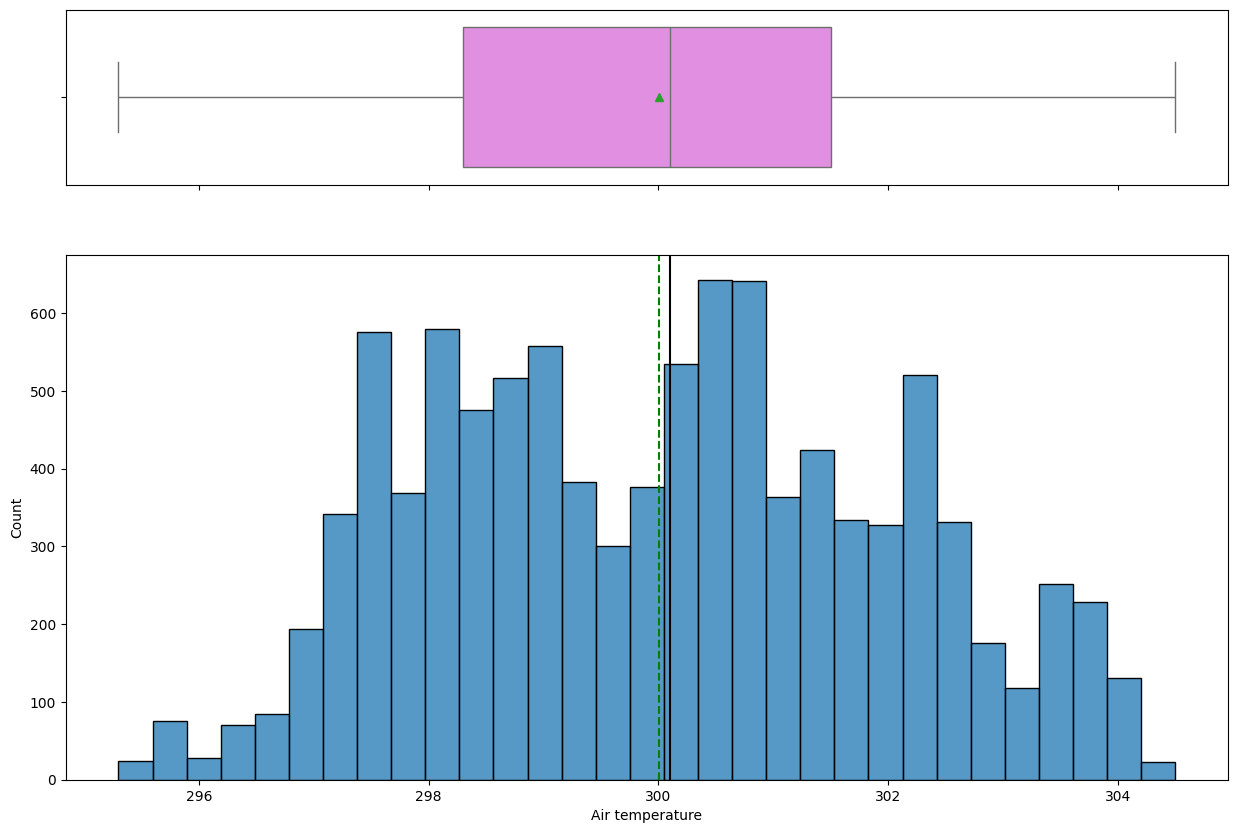

In [20]:
histogram_boxplot(data, "Air temperature")

* The `air temperature` distribution looks slightly left skewed with a mean temperature around 300K.
* There is no outlier present.

#### `Process temperature`

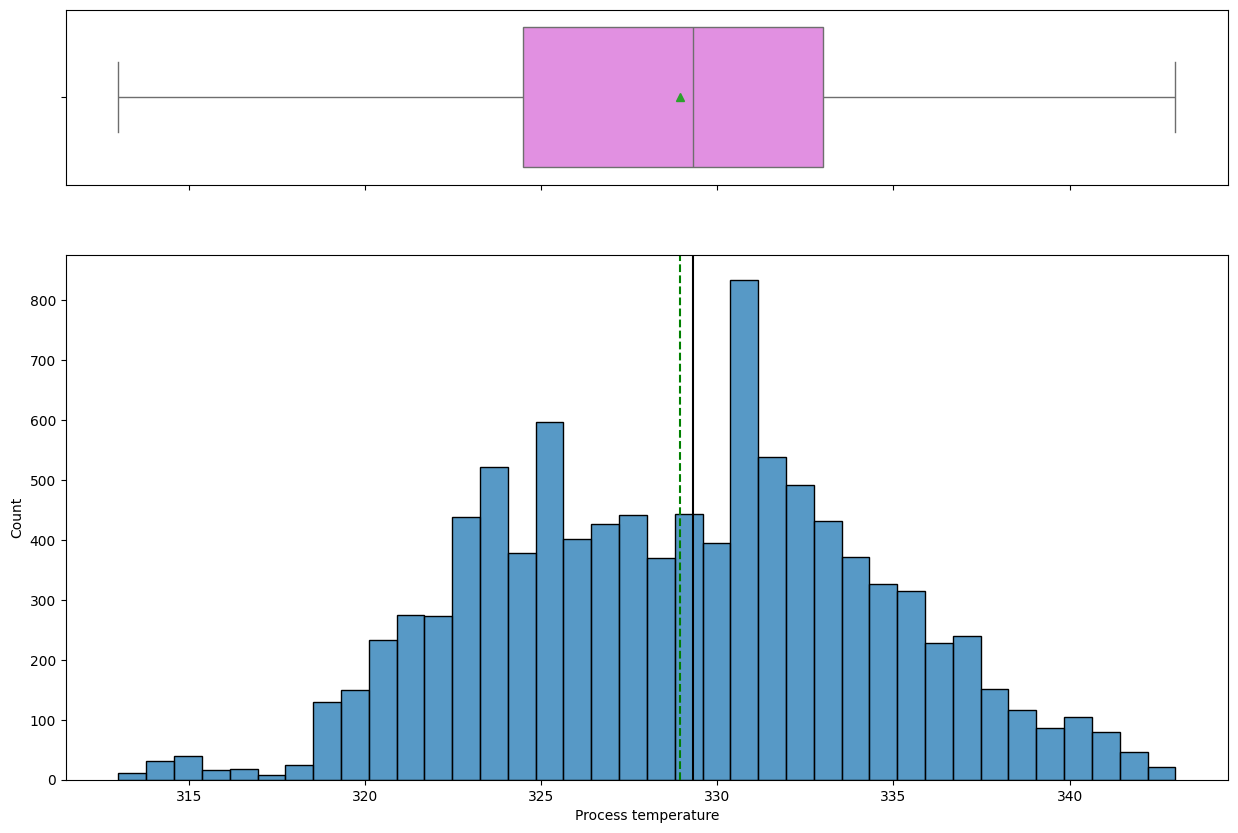

In [21]:
histogram_boxplot(data, "Process temperature")

* The `process temperature` distribution looks slightly left skewed with a mean temperature around 329K.
* There is no outlier present.

#### `Rotational speed`

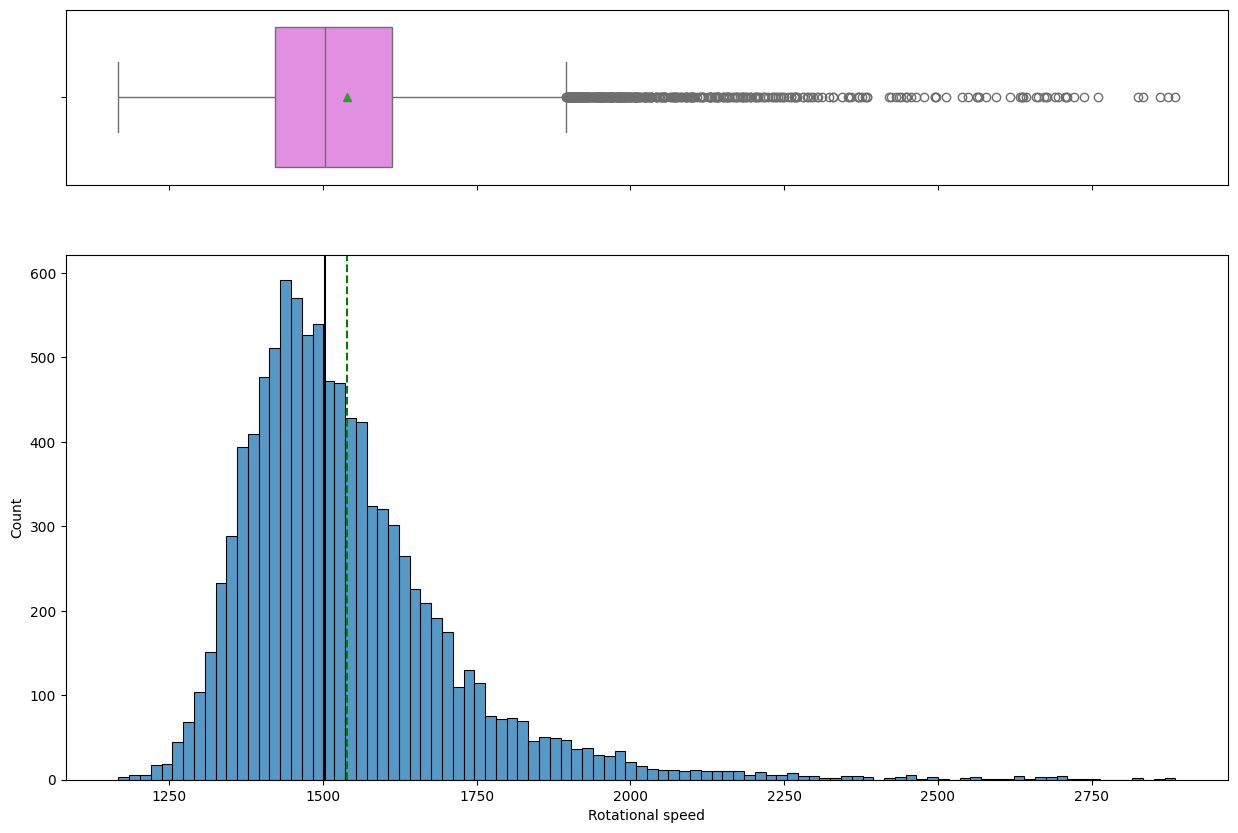

In [22]:
histogram_boxplot(data, "Rotational speed")

* The `rotational speed` is right skewed with many outliers on the upper quartile.
* Some of the manufacturing operations are performed at a higher speed.

#### `Torque`

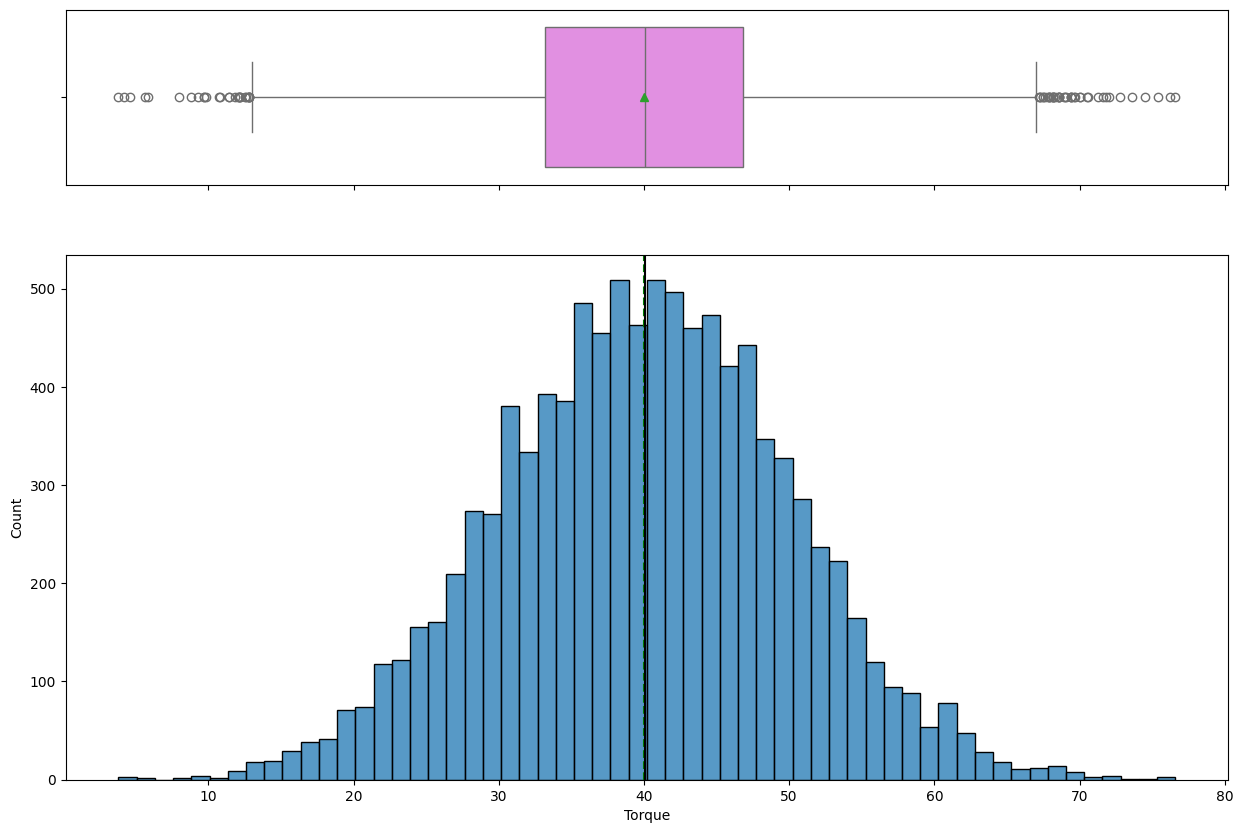

In [23]:
histogram_boxplot(data, "Torque")

* The distribution of `torque` is normal with mean torque around 40 Nm.
* Outliers are present on both sides.

#### `Tool Wear`

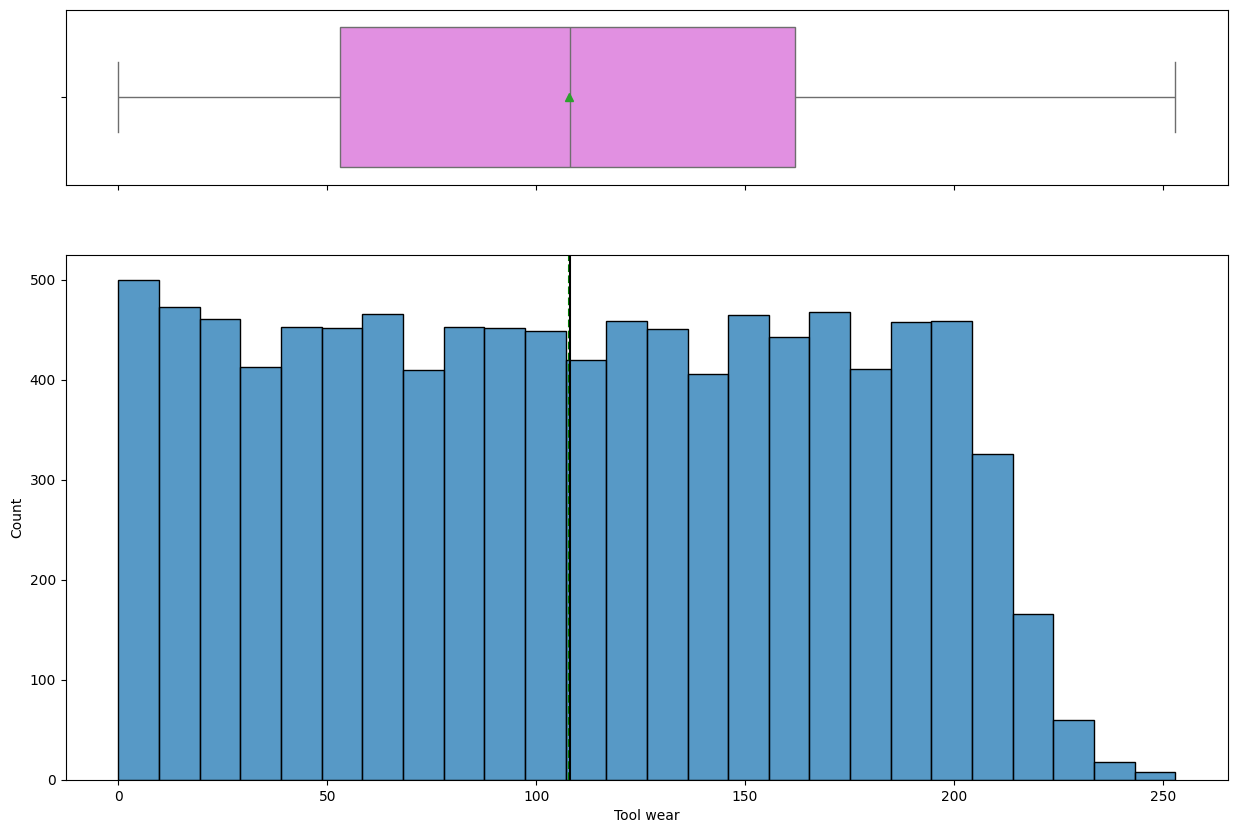

In [24]:
histogram_boxplot(data, "Tool wear")

* `Tool wear` is uniformly distributed with some of the higher values being less frequent.

#### `Type`

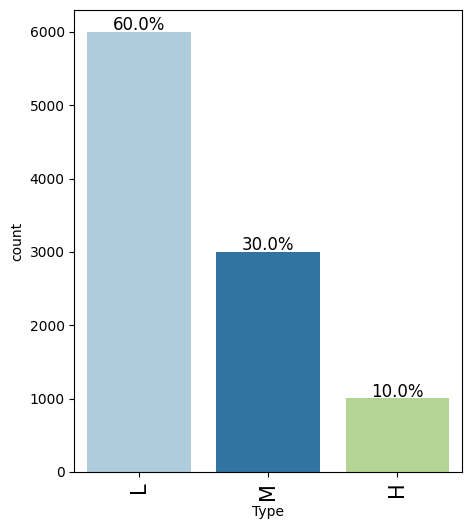

In [25]:
labeled_barplot(data, "Type", perc=True)

* Around 60% of products are of low quality, 30% are of medium quality whereas 10% are of high quality

#### `Failure`

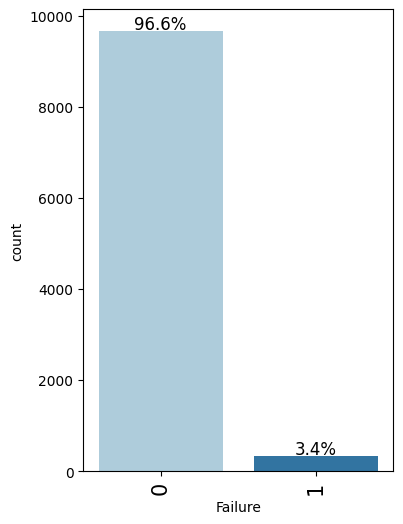

In [26]:
labeled_barplot(data, "Failure", perc=True)

* In 96.6% of observations the machine does not fail while in 3.4% of observations it fails.

### Bivariate Analysis

#### `Correlation`

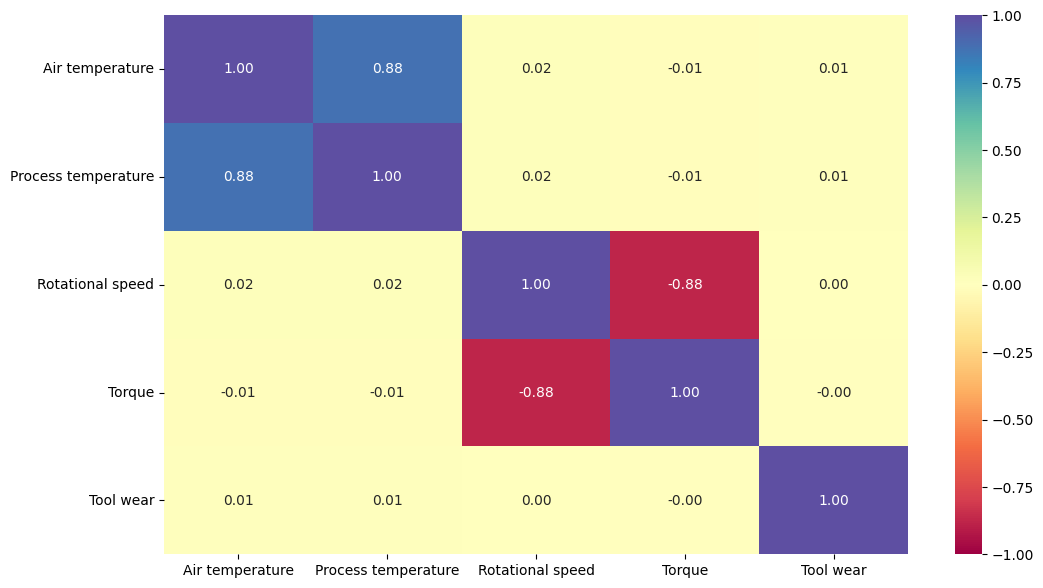

In [27]:
num_cols_list = data.select_dtypes(include=np.number).columns.tolist()
num_cols_list.remove('Failure')

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[num_cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There's a positive correlation between the `air temperature` and `process temperature`.
* There's a negative correlation between the `rotational speed` and `torque`.
* No other variables are correlated. We will analyze it further.

**Let's see how the target variable varies across the type of the product**

#### `Type vs Failure`

Failure     0    1    All
Type                     
All      9661  339  10000
L        5765  235   6000
M        2914   83   2997
H         982   21   1003
------------------------------------------------------------------------------------------------------------------------


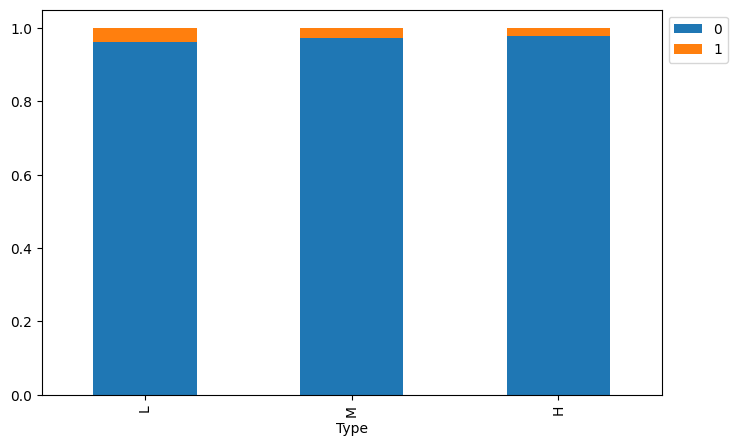

In [28]:
stacked_barplot(data, "Type", "Failure")

* Around 70 % of the failure occurred during machining of L type i.e., low-quality products.
* Machining of high-quality products is less prone to failure.

**Let's analyze the relation between `Process temperature` and `Failure`.**

#### `Process temperature vs Failure`

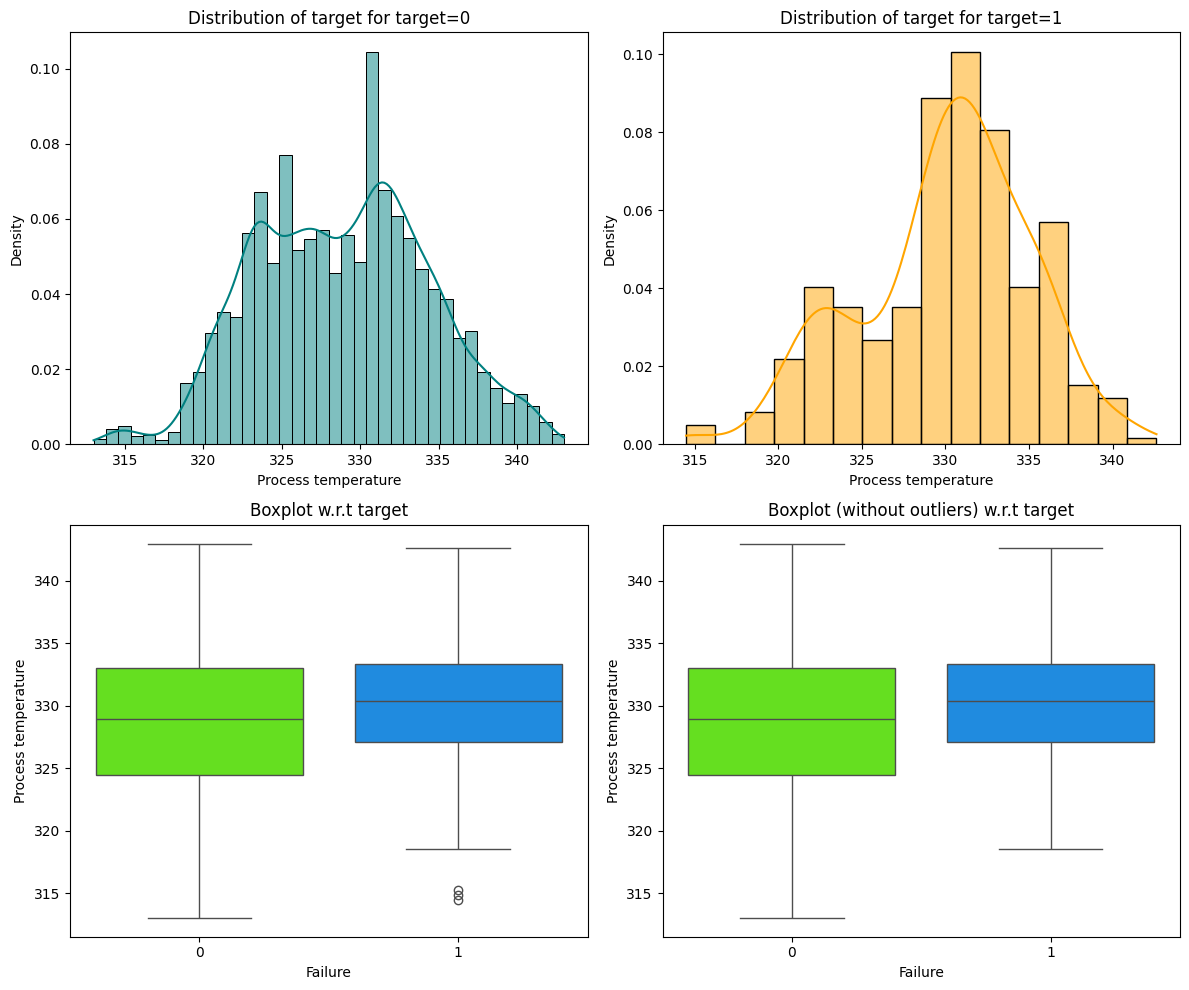

In [29]:
distribution_plot_wrt_target(data, "Process temperature", "Failure")

* Most of the failures of the manufacturing system occur at higher `Process temperature`.

**Let's analyze the relation between `Rotational speed` and `Failure`.**

#### `Rotational speed vs Failure`

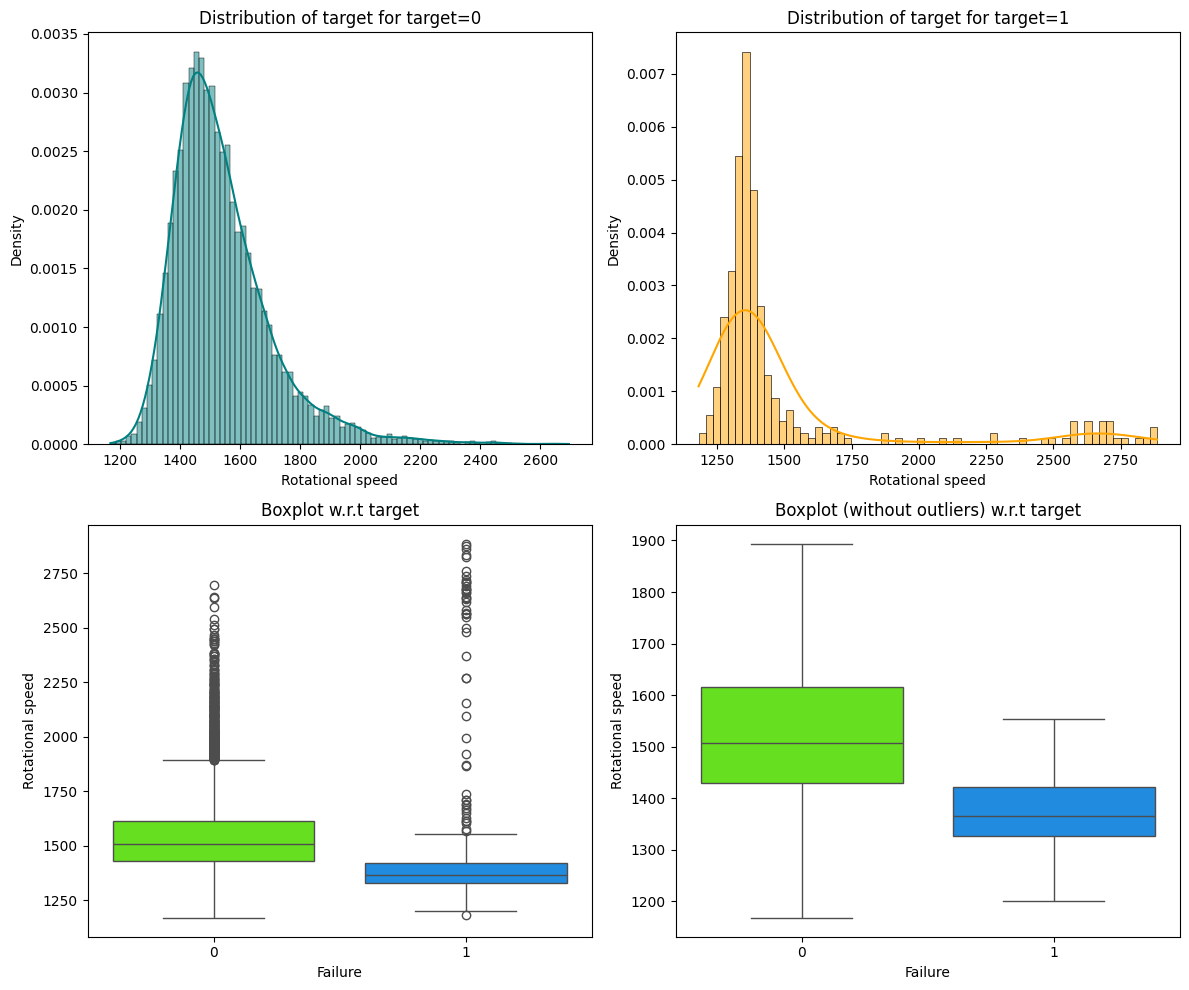

In [30]:
distribution_plot_wrt_target(data, "Rotational speed", "Failure")

* There is a clear boundary showing separation of failure status based of the values of `Rotational speed`.
* Manufacturing system is more prone to failure at lower `Rotational speed` than at higher rotational speed.

## Data Preprocessing

### Outlier Detection

**Let's check for outliers in the data.**

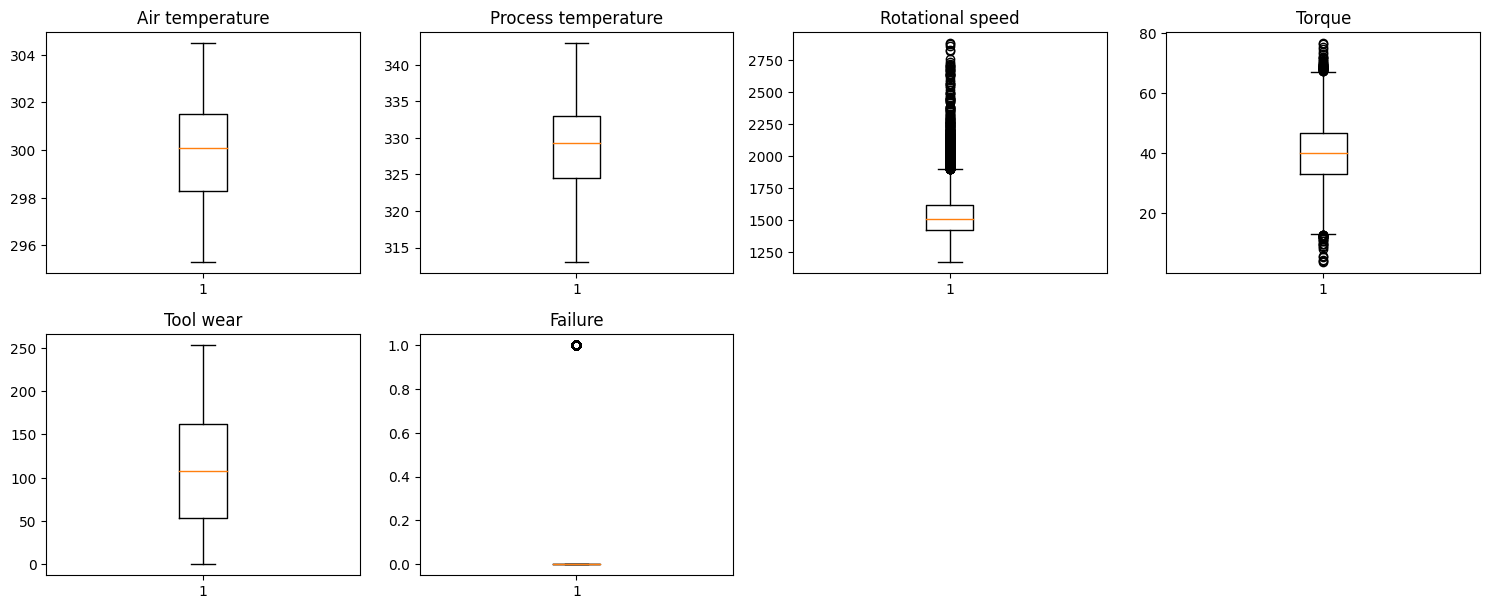

In [31]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observations

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

### Encoding categorical variables

In [32]:
X = data.drop(["Failure"], axis=1)
Y = data["Failure"]

In [33]:
# one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True,dtype = int)

In [34]:
X.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Type_L,Type_M
0,298.10000,323.74074,1551,42.80000,0,0,1
1,298.20000,324.11111,1408,46.30000,3,1,0
2,298.10000,323.37037,1498,49.40000,5,1,0
3,298.20000,323.74074,1433,39.50000,7,1,0
4,298.20000,324.11111,1408,40.00000,9,1,0


### Normalizing the numerical variables

In [35]:
num_columns = ['Air temperature', 'Process temperature','Rotational speed','Torque','Tool wear']

In [36]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the selected columns in the x_train data
scaler.fit(X[num_columns])

# Transform selected columns in X using the fitted scaler

X[num_columns] = scaler.transform(X[num_columns])

In [37]:
X.head()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Type_L,Type_M
0,-0.95239,-0.94736,0.06819,0.28220,-1.69598,0,1
1,-0.90239,-0.87996,-0.72947,0.63331,-1.64885,1,0
2,-0.95239,-1.01476,-0.22745,0.94429,-1.61743,1,0
3,-0.90239,-0.94736,-0.59002,-0.04885,-1.58601,1,0
4,-0.90239,-0.87996,-0.72947,0.00131,-1.55459,1,0


### Train Test Split

In [38]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [39]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (7000, 7)
Shape of test set :  (3000, 7)
Percentage of classes in training set:
Failure
0   0.96629
1   0.03371
Name: proportion, dtype: float64
Percentage of classes in test set:
Failure
0   0.96567
1   0.03433
Name: proportion, dtype: float64


* We had seen that around 96.6% of observations belongs to class 0 (Not Failed) and 3.37% observations belongs to class 1 (Failed), and this is preserved in the train and test sets

## Model Building

### Model Evaluation

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting a machine will not fail but in reality, the machine will fail (FN)
- Predicting a machine will fail but in reality, the machine will not fail (FP)

**Which case is more important?**

- If we predict that a machine will not fail but in reality, the machine fails, then the company will have to bear the cost of repair/replacement and also face equipment downtime losses
- If we predict that a machine will fail but in reality, the machine does not fail, then the company will have to bear the cost of inspection
- The inspection cost is generally less compared to the repair/replacement cost

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [40]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [41]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### K- Nearest Neighbor

In order to optimize our model, it's essential to experiment with different values of k to find the most suitable fit for our data. We can commence this process by setting k equal to 3 and gradually exploring other values to assess their impact on the model's performance.

- We'll only consider odd values of K as the classification will be done based on majority voting.

#### K=3

In [42]:
# instantiate learning model (k = 3)
knn_3 = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

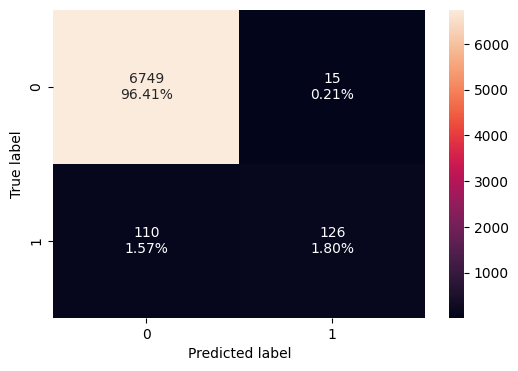

In [43]:
confusion_matrix_sklearn(knn_3, X_train, y_train)

In [44]:
knn_perf_train_3 = model_performance_classification_sklearn(
    knn_3, X_train, y_train
)
knn_perf_train_3

,Accuracy,Recall,Precision,F1
0,0.98214,0.53390,0.89362,0.66844


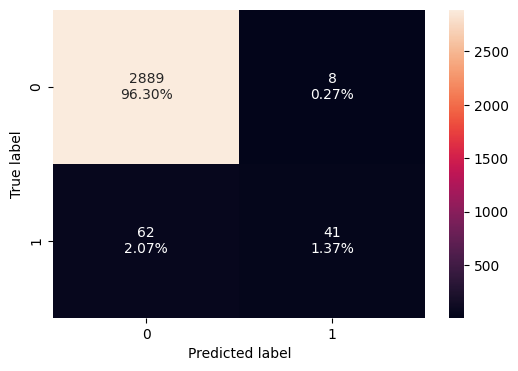

In [45]:
confusion_matrix_sklearn(knn_3, X_test, y_test)

In [46]:
knn_perf_test_3 = model_performance_classification_sklearn(
    knn_3, X_test, y_test
)
knn_perf_test_3

,Accuracy,Recall,Precision,F1
0,0.97667,0.39806,0.83673,0.53947


Let's run the KNN with no of neighbours to be 1,3,5..19 and find the optimal number of neighbours from the above list using the recall score

#### K with different values

In [47]:
# creating odd list of K for KNN
# myList = list(range(2,20))

# subsetting just the odd ones
# neighbors = list(filter(lambda x: x % 2 != 0, myList))

# creating a list of odd values of K for KNN
neighbors = [i for i in range(3,20) if i%2 != 0]

# empty list that will hold recall scores
recall_scores_train = []
recall_scores_test = []

# perform recall metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # predict on train and test
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # evaluate recall on train and test
    scores_train = recall_score(y_train, y_pred_train)
    recall_scores_train.append(scores_train)
    scores_test = recall_score(y_test, y_pred_test)
    recall_scores_test.append(scores_test)

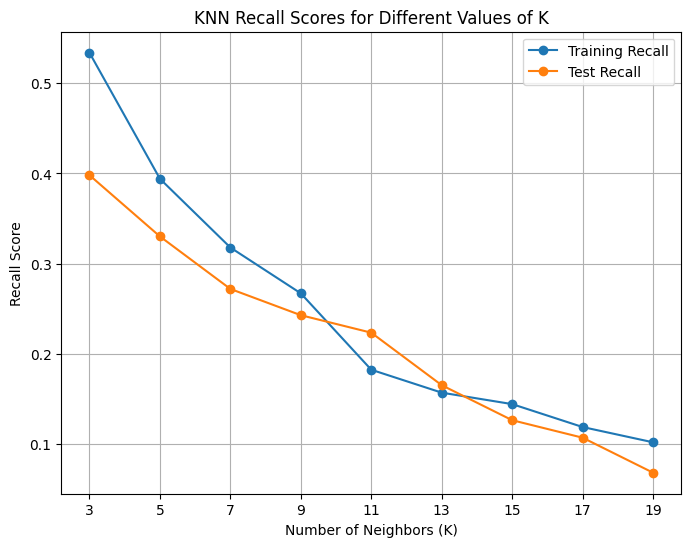

In [48]:
import matplotlib.pyplot as plt

# Plot recall scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o')
plt.title('KNN Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

- The recall scores for both training and test sets are highest when k=3. This suggests that with k=3, the model is better at identifying positive instances in both the training and test data compared to other values of k.

- As the value of k increases beyond 3, the recall scores tend to decrease for both training and test sets. This indicates a potential risk of the model not being able to identify the underlying patterns in the data.

- Therefore, based on the provided recall scores, k=3 appears to be the most suitable choice for balancing model performance between capturing positive instances effectively and generalizing well to new data.

###Naive Bayes

In [49]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

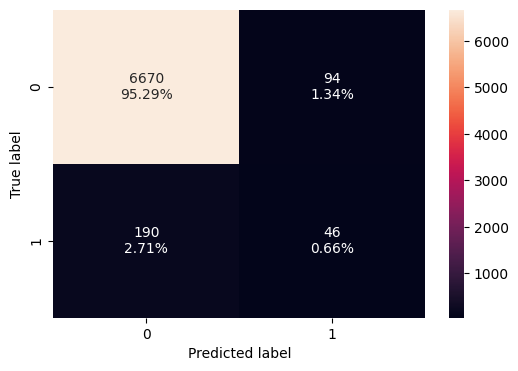

In [50]:
confusion_matrix_sklearn(nb, X_train, y_train)

In [51]:
nb_perf_train = model_performance_classification_sklearn(
    nb, X_train, y_train
)
nb_perf_train

,Accuracy,Recall,Precision,F1
0,0.95943,0.19492,0.32857,0.24468


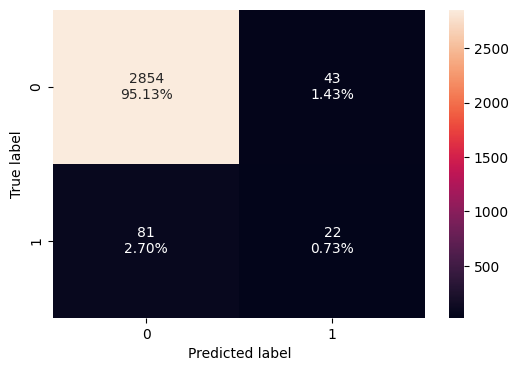

In [52]:
confusion_matrix_sklearn(nb, X_test, y_test)

In [53]:
nb_perf_test = model_performance_classification_sklearn(
    nb, X_test, y_test
)
nb_perf_test

,Accuracy,Recall,Precision,F1
0,0.95867,0.21359,0.33846,0.26190


### Logistic Regression

In [76]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [81]:
failure_machine_predict = model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, failure_machine_predict)))
print()

Model Accuracy: 0.9700



In [83]:
failure_machine_predict = model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, failure_machine_predict)))
print()

Model Accuracy: 0.9707



In [77]:
logistic_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
logistic_perf_test

,Accuracy,Recall,Precision,F1
0,0.97067,0.18447,0.82609,0.30159


## Comparison of Models and Final Model Selection

In [78]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        knn_perf_train_3.T,
        nb_perf_train.T,
        logistic_perf_test.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "K Nearest Neighbor k=3",
    "Naive Bayes",
    "Logistic Regression"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,K Nearest Neighbor k=3,Naive Bayes,Logistic Regression
Accuracy,0.98214,0.95943,0.97067
Recall,0.53390,0.19492,0.18447
Precision,0.89362,0.32857,0.82609
F1,0.66844,0.24468,0.30159


In [55]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        knn_perf_test_3.T,
        nb_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "K Nearest Neighbor k=3",
    "Naive Bayes",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,K Nearest Neighbor k=3,Naive Bayes
Accuracy,0.97667,0.95867
Recall,0.39806,0.21359
Precision,0.83673,0.33846
F1,0.53947,0.26190


- In both the training and test sets, the K Nearest Neighbor model with k=3 demonstrates the highest recall among all compared models. This indicates that the model with k=3 is better at correctly identifying positive instances compared to the models with different k values and Naive Bayes.

- Naive Bayes consistently shows lower recall values compared to K Nearest Neighbor models with different k values. This suggests that Naive Bayes may struggle to capture positive instances as effectively as K Nearest Neighbor models in both training and test datasets, highlighting potential limitations in its performance for this specific task.

## Conclusions and Recommendations

- There is a clear boundary showing separation of failure status based of the values of `Rotational speed`.
- Manufacturing system is more prone to failure at lower `Rotational speed` than at higher rotational speed.
- Among the models evaluated, K Nearest Neighbor with k=3 consistently exhibits the highest recall scores for both the training and test sets. This indicates that the KNN model with k=3 is more effective at correctly identifying instances of equipment failure in the fuel injector nozzle manufacturing unit compared to other models and different values of k.
- Its superior recall performance indicates its effectiveness in minimizing false negatives, which is critical for proactive maintenance and minimizing equipment downtime.
- AutoMobi Engineering Pvt. Ltd should integrate the K Nearest Neighbor (KNN) model with k=3 into their operational workflow as part of a comprehensive predictive maintenance system. By leveraging this model, the company can proactively detect potential equipment failures in the fuel injector nozzle manufacturing unit, enabling timely intervention and preventive maintenance actions. This integration will lead to reduced downtime, optimized maintenance schedules, and improved overall equipment effectiveness.

## <a name='link1'>Appendix: Detailed Exploratory Data Analysis (EDA)</a>

### Univariate Analysis

#### Observation on Air temperature

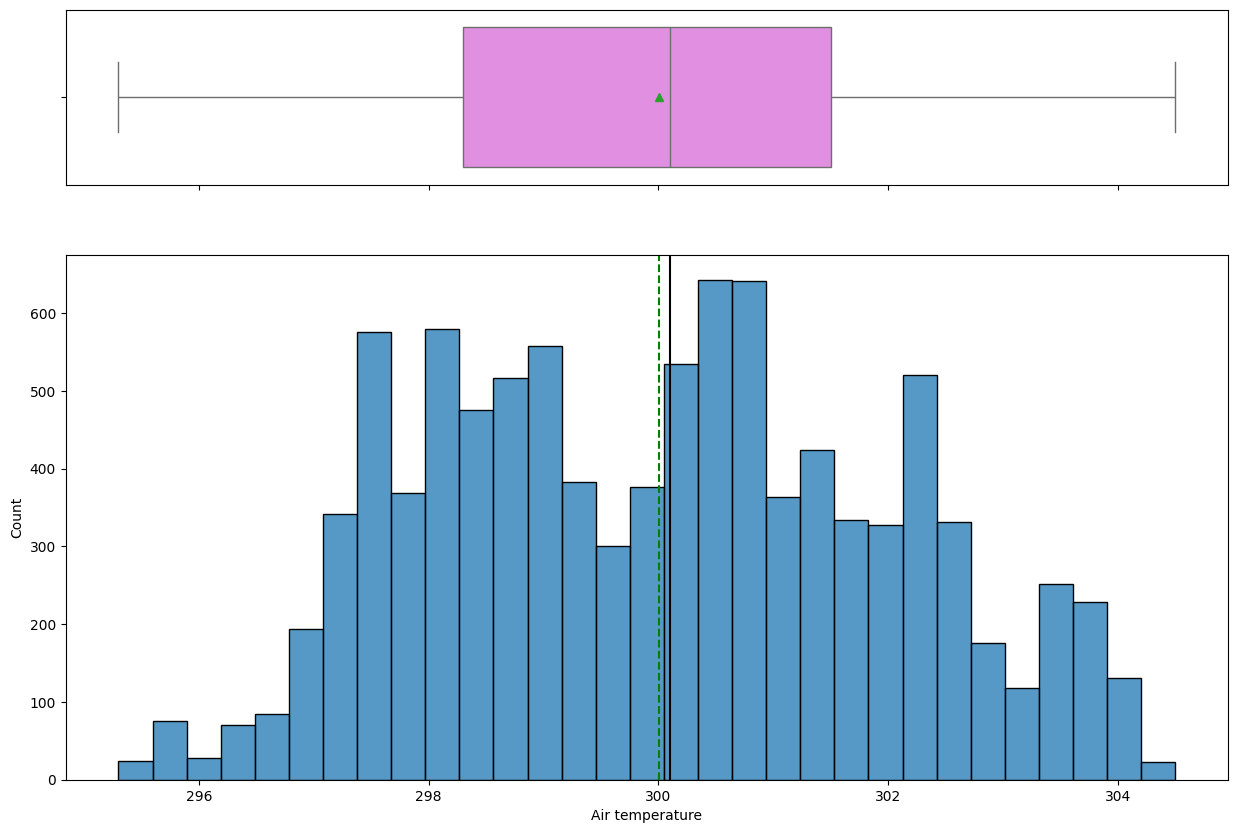

In [56]:
histogram_boxplot(data, "Air temperature")

* The `air temperature` distribution looks slightly left skewed with a mean temperature around 300K.
* There is no outlier present.

#### Observation on Process temperature

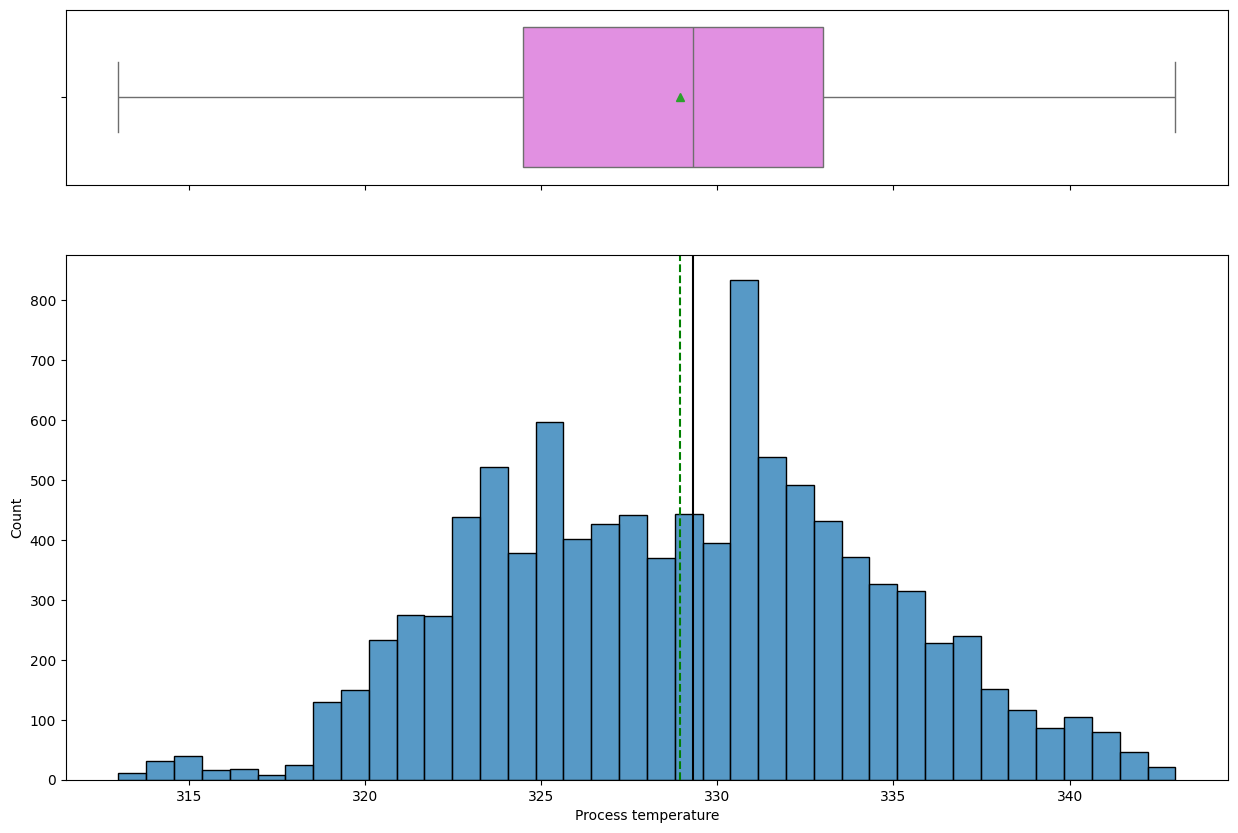

In [57]:
histogram_boxplot(data, "Process temperature")

* The `process temperature` distribution looks slightly left skewed with a mean temperature around 329K.
* There is no outlier present.

#### Observation on Rotational Speed

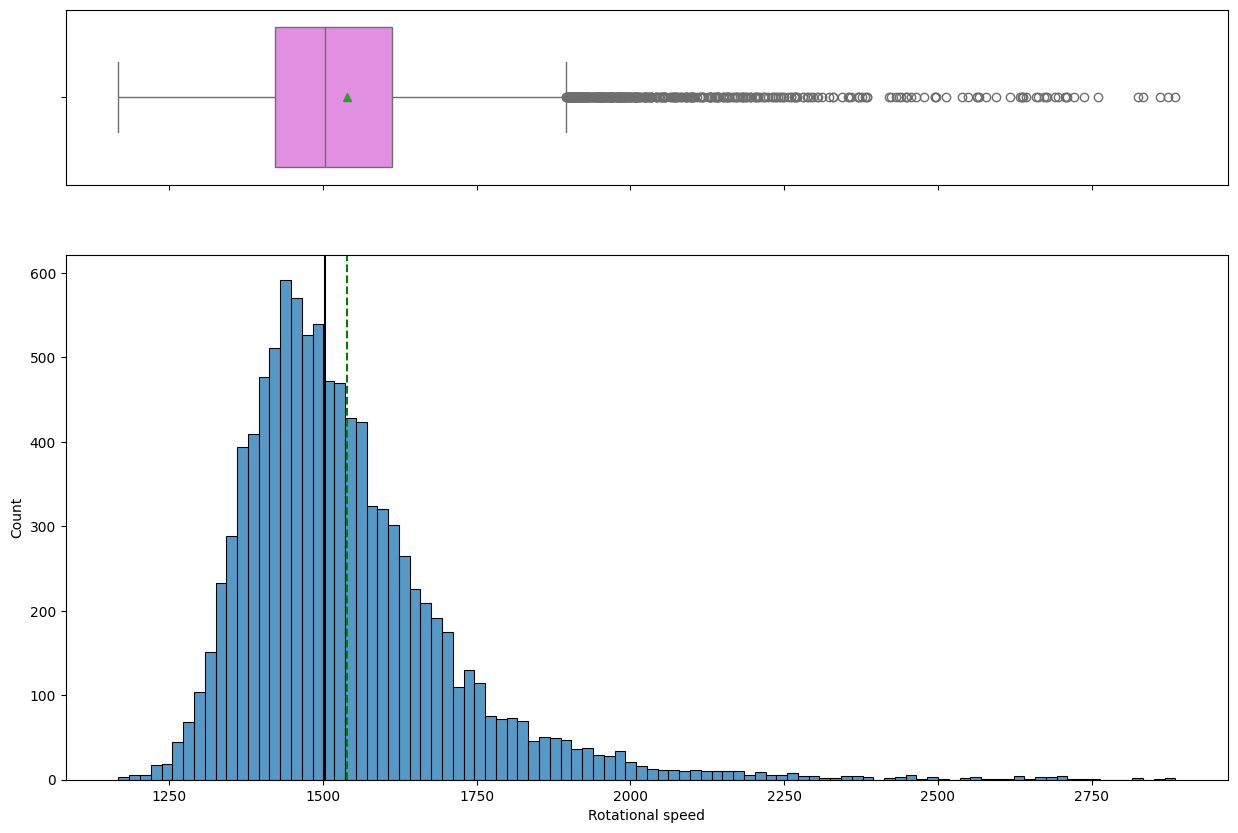

In [58]:
histogram_boxplot(data, "Rotational speed")

* The `rotational speed` is right skewed with many outliers on the upper quartile.
* Some of the manufacturing operations are performed at a higher speed.

#### Observation on Torque

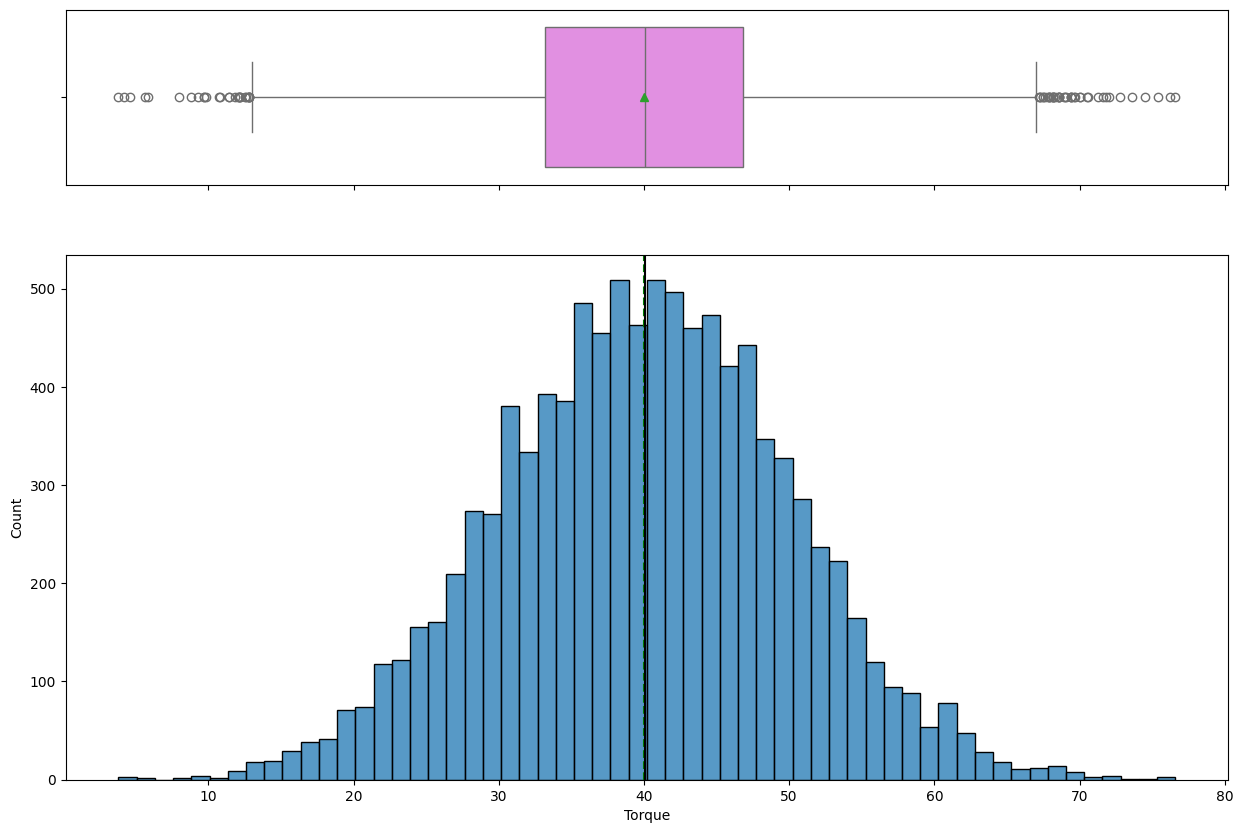

In [59]:
histogram_boxplot(data, "Torque")

* The distribution of `torque` is normal with mean torque around 40 Nm.
* Outliers are present on both sides.

#### Observation on Tool Wear

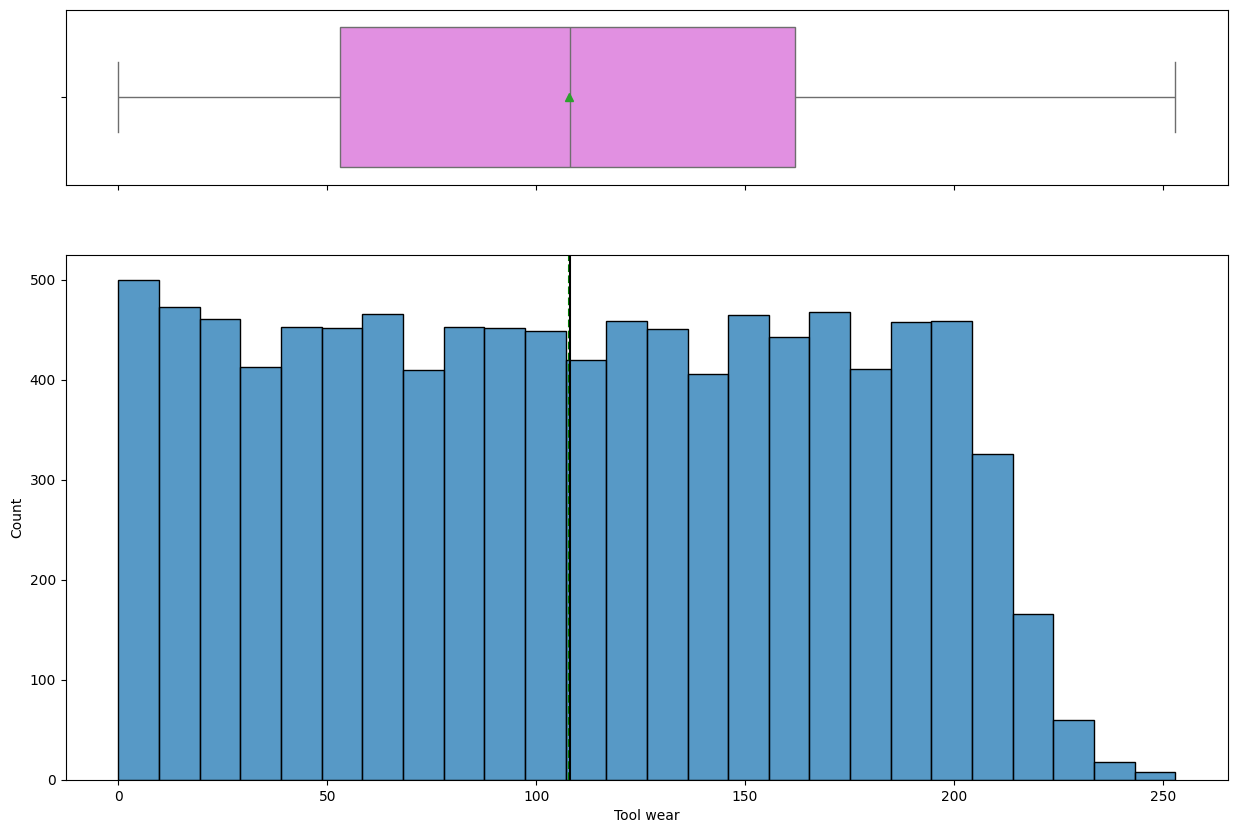

In [60]:
histogram_boxplot(data, "Tool wear")

* `Tool wear` is uniformly distributed with some of the higher values being less frequent.

#### Observation on Type of product

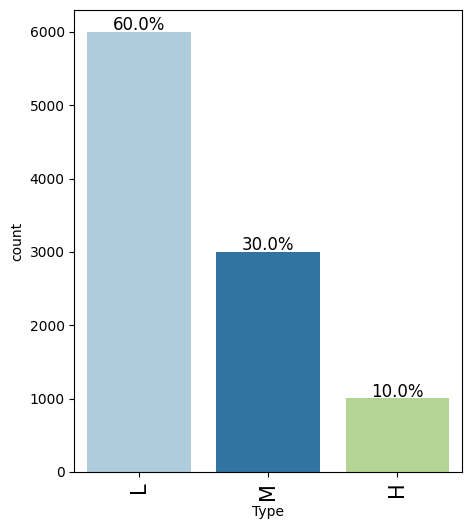

In [61]:
labeled_barplot(data, "Type", perc=True)

* Around 60% of products are of low quality, 30% are of medium quality whereas 10% are of high quality

#### Observation on `Failure`

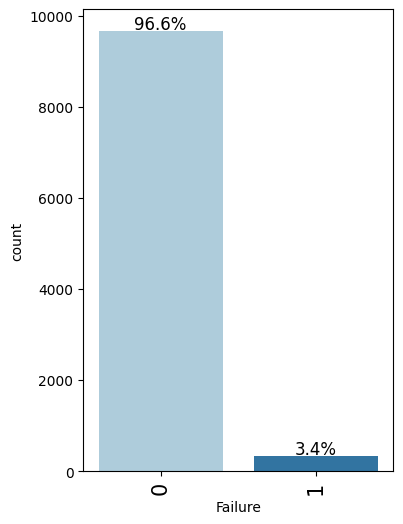

In [62]:
labeled_barplot(data, "Failure", perc=True)

* In 96.6% of observations the machine does not fail while in 3.4% of observations it fails.

### Bivariate Analysis

#### Correlation Check

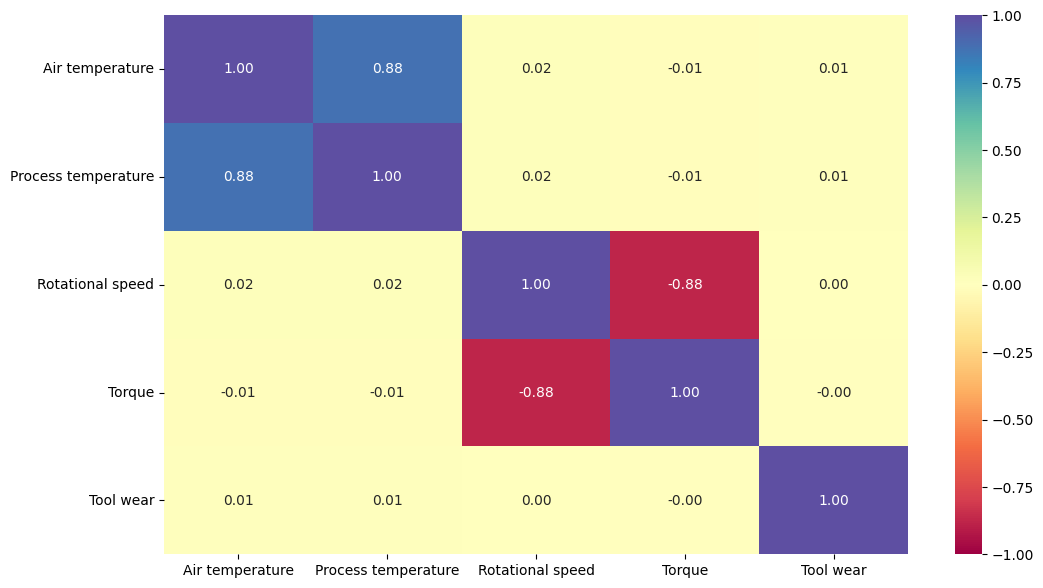

In [63]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('Failure')

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There's a positive correlation between the `air temperature` and `process temperature`.
* There's a negative correlation between the `rotational speed` and `torque`.
* No other variables are correlated. We will analyze it further.

#### Observation on `Type` vs `Air temperature`

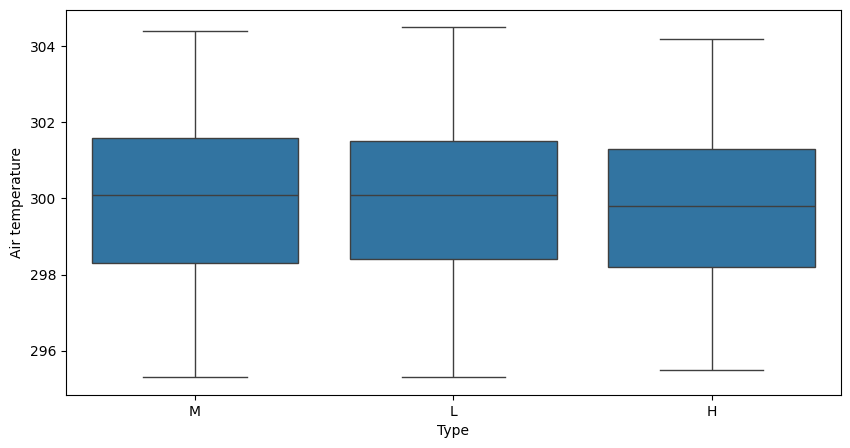

In [64]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Air temperature")
plt.show()

* There is no distinct difference in values of `Air temperature` and `Type`

#### Observation on `Type` vs `Process temperature`

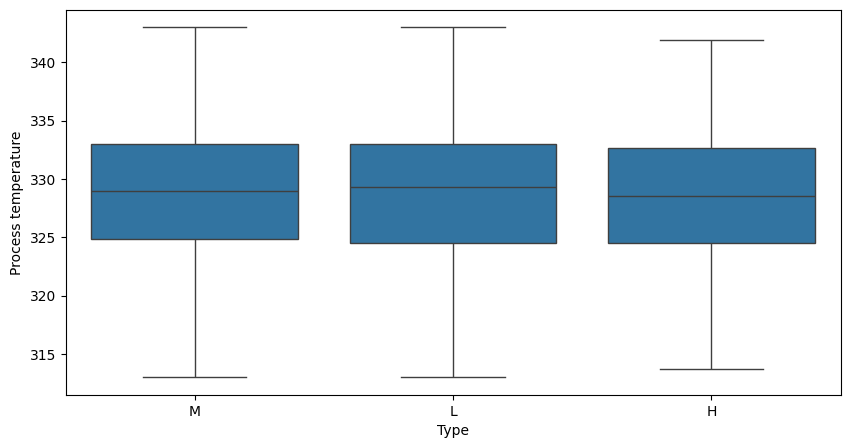

In [65]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Process temperature")
plt.show()

* There is no distinct difference in values of `Process temperature` and `Type` for M and L types.
* Lesser `Process temperature` is observed in manufacturing H type of products.

#### Observation on `Type` vs `Rotational speed`

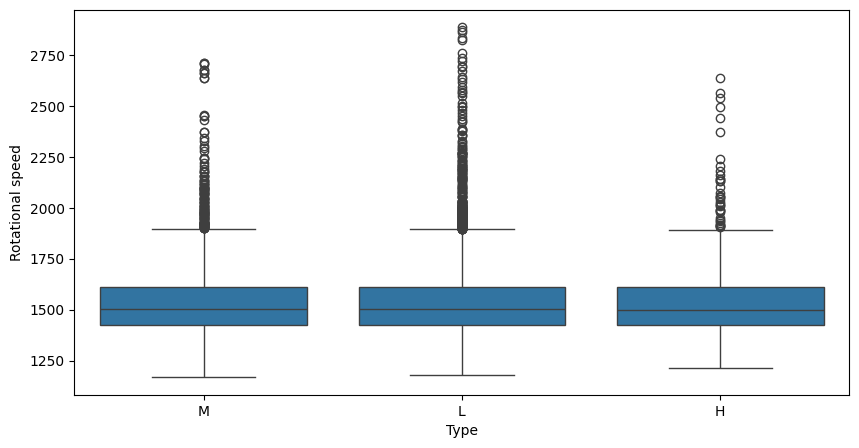

In [66]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Rotational speed")
plt.show()

* Some of the L type of products are manufactured at higher rotational speed

#### Observation on `Type` vs `Tool wear`

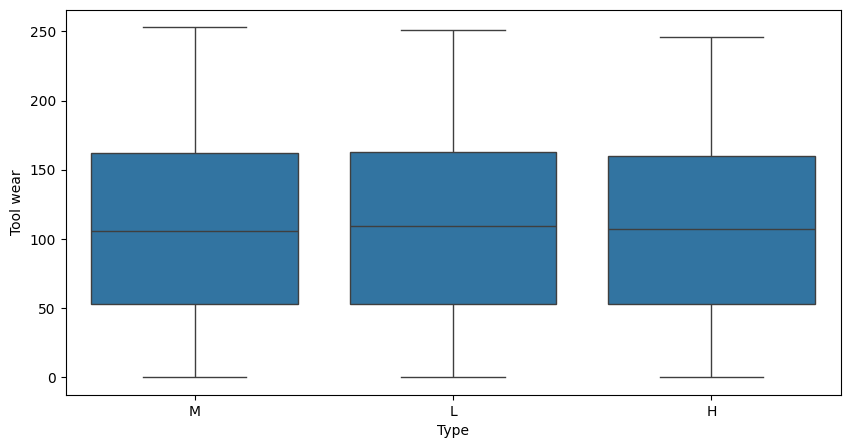

In [67]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Tool wear")
plt.show()

* There is no distinct difference in values of `Tool wear` and `Type`

#### Observation on `Type` vs `Torque`

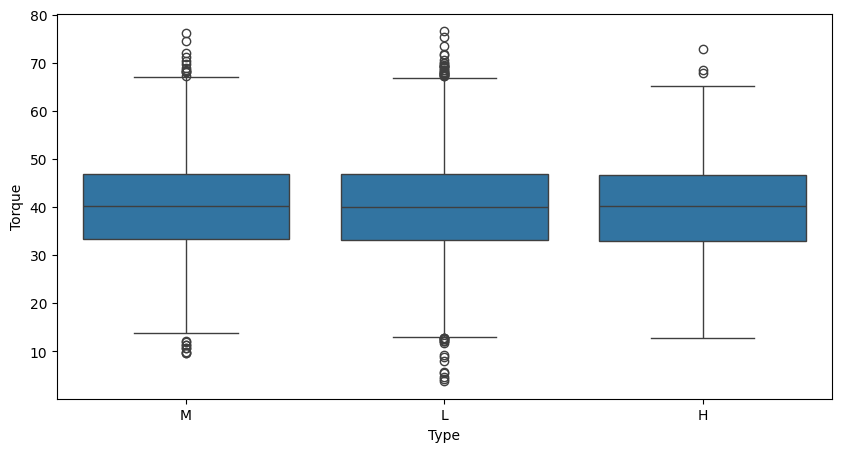

In [68]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Type", y="Torque")
plt.show()

* Some of the L type products are manufactured at lower `Toque` as compared to M and H type of products.

#### Failure vs Type

**Let's see how the target variable varies across the type of the product**

Failure     0    1    All
Type                     
All      9661  339  10000
L        5765  235   6000
M        2914   83   2997
H         982   21   1003
------------------------------------------------------------------------------------------------------------------------


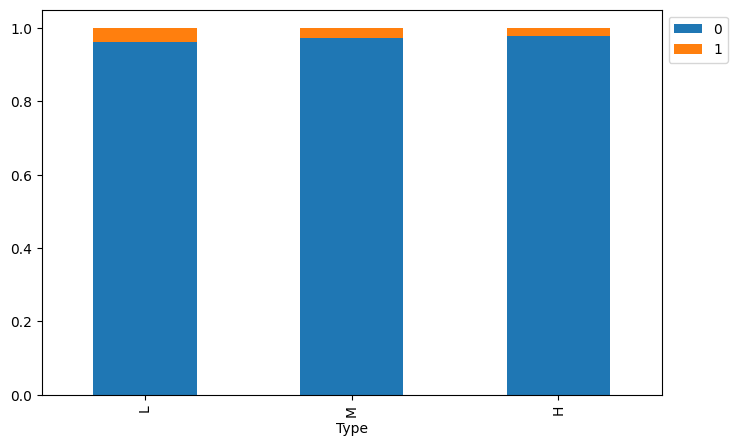

In [69]:
stacked_barplot(data, "Type", "Failure")

* Around 70 % of the failure occurred during machining of L type i.e., low-quality products.
* Machining of high-quality products is less prone to failure.

#### Distribution of numerical input variables by failure status

**Let's analyze the relation between `Air temperature` and `Failure`.**

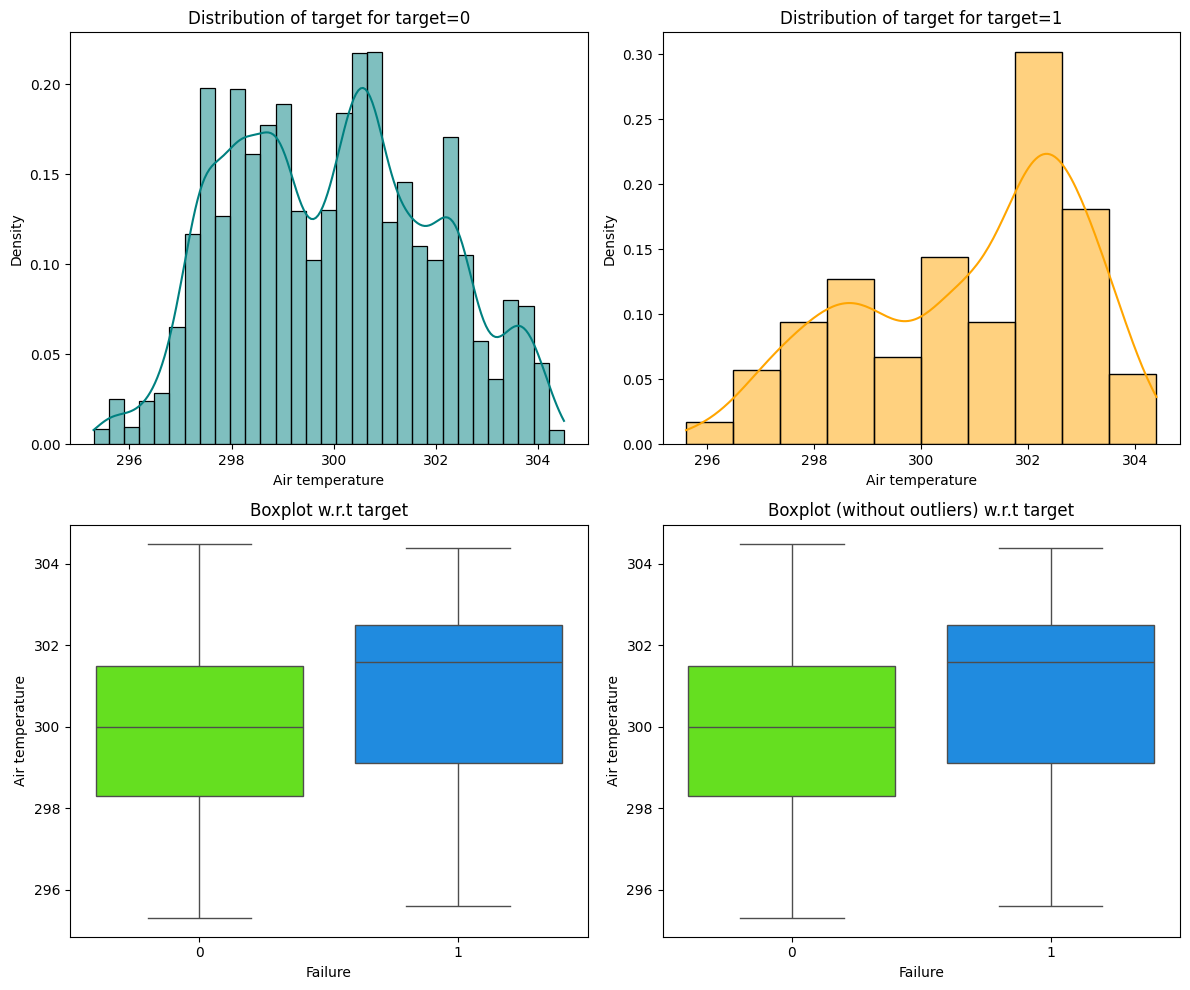

In [70]:
distribution_plot_wrt_target(data, "Air temperature", "Failure")

* Most of the failures of the manufacturing system occur at higher `Air temperature`.


**Let's analyze the relation between `Process temperature` and `Failure`.**

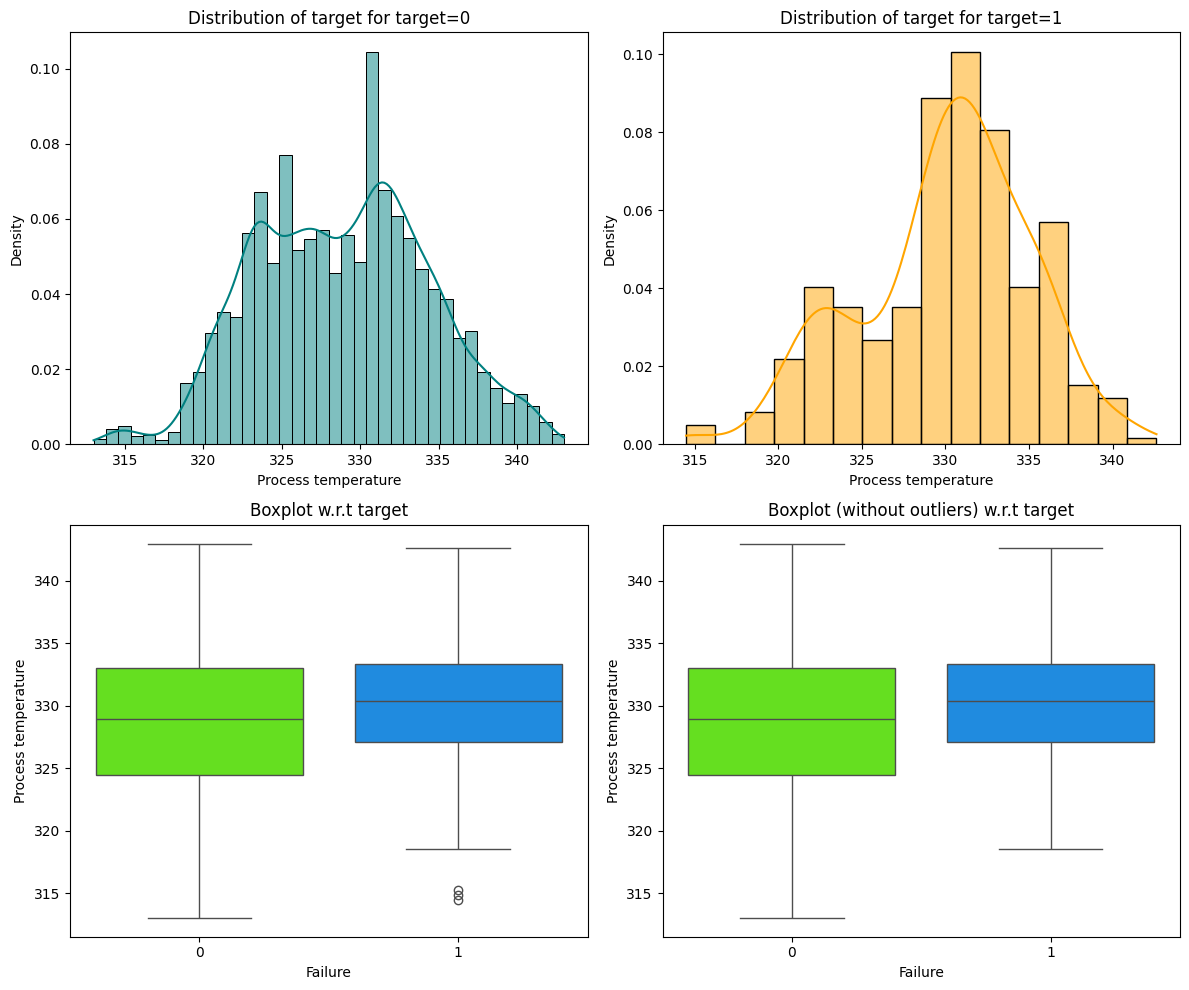

In [71]:
distribution_plot_wrt_target(data, "Process temperature", "Failure")

* Most of the failures of the manufacturing system occur at higher `Process temperature`.

**Let's analyze the relation between `Rotational speed` and `Failure`.**

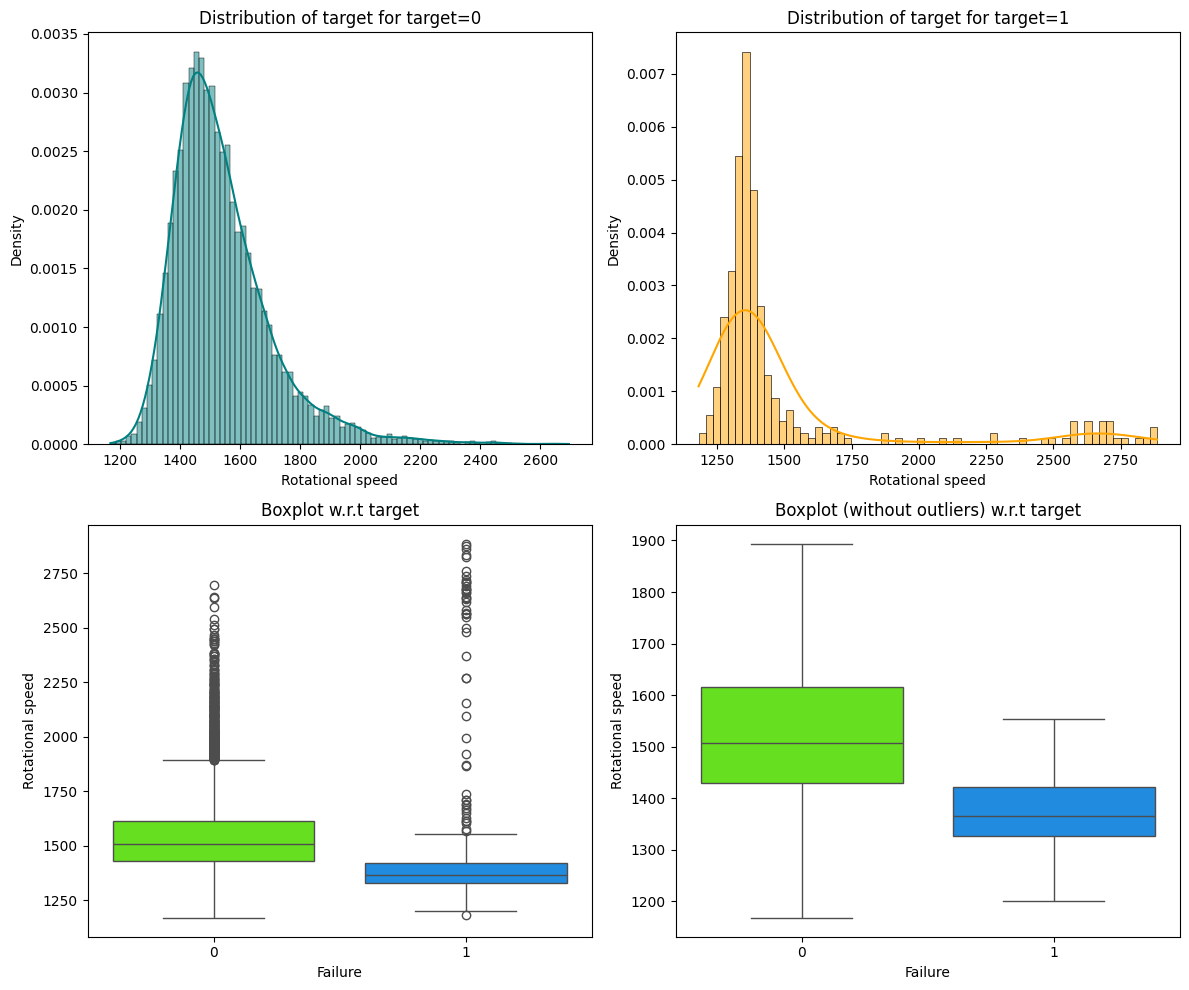

In [72]:
distribution_plot_wrt_target(data, "Rotational speed", "Failure")

* Manufacturing system is more prone to failure at lower `Rotational speed` than at higher rotational speed.

**Let's analyze the relation between `Torque` and `Failure`.**

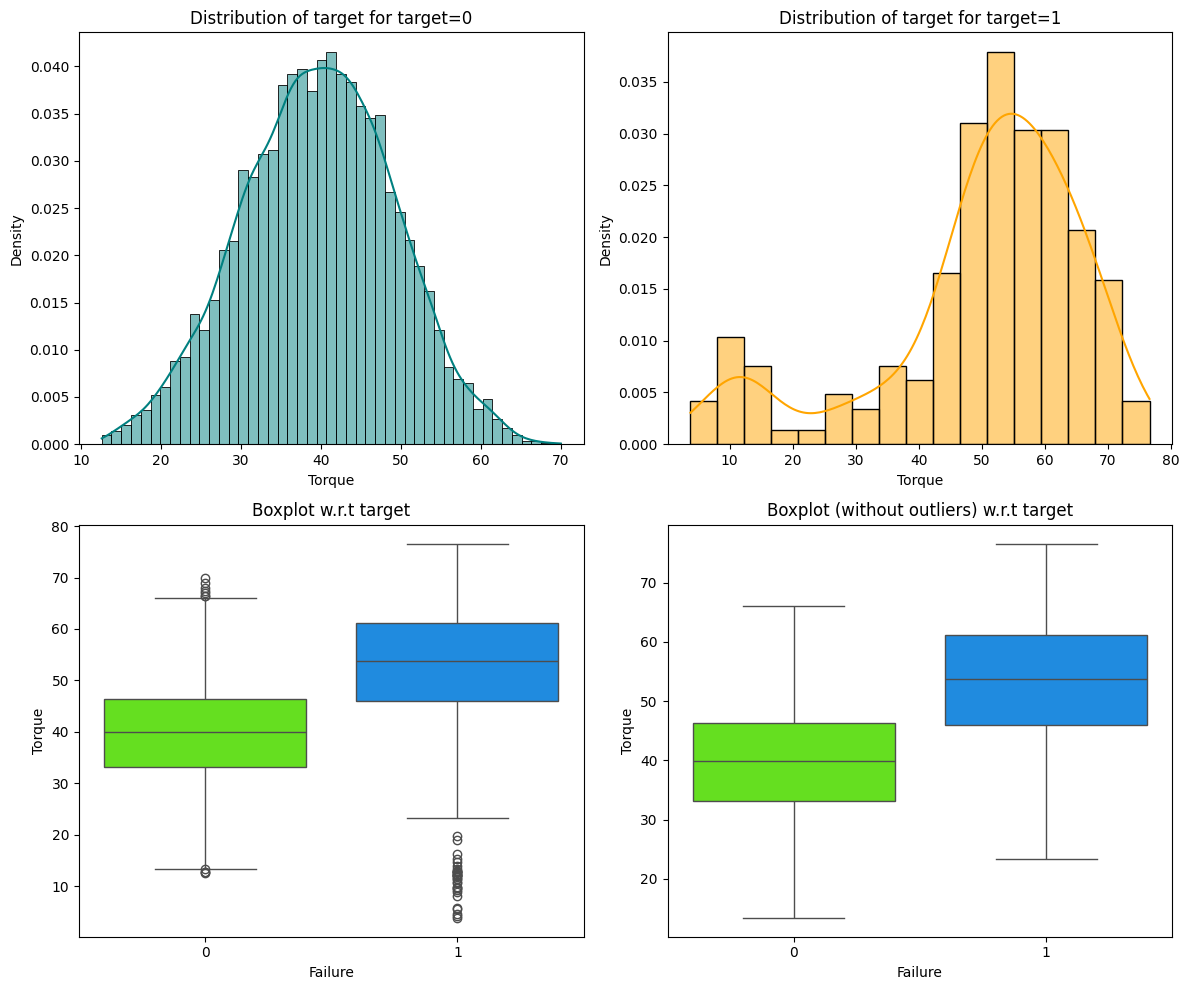

In [73]:
distribution_plot_wrt_target(data, "Torque", "Failure")

* Most of the failures of the manufacturing system occur at higher torque as compared to lower values of torque.

**Let's analyze the relation between `Tool wear` and `Failure`.**

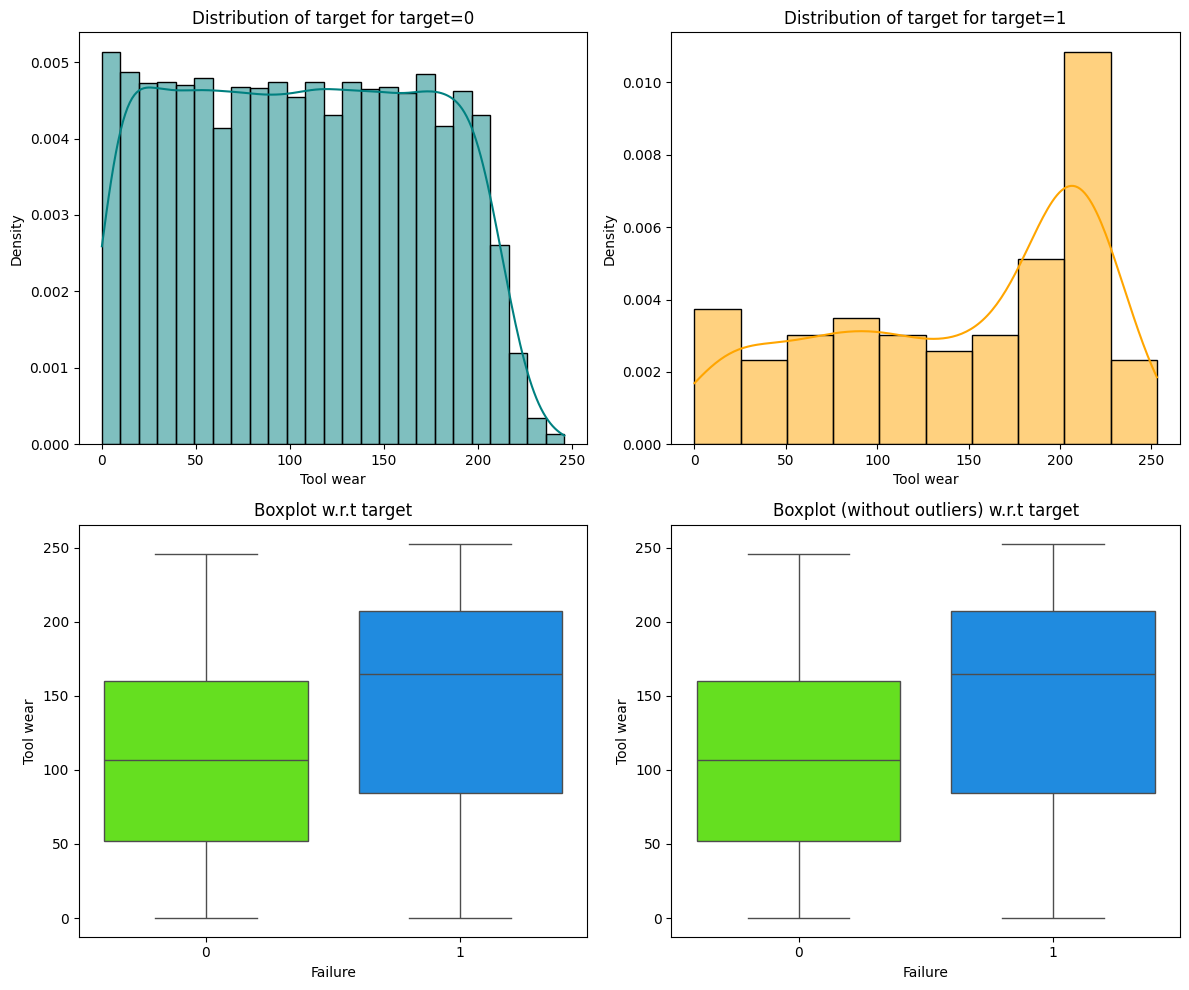

In [74]:
distribution_plot_wrt_target(data, "Tool wear", "Failure")

* Most of the failures occur at higher values of tool wear than at lower tool wear.

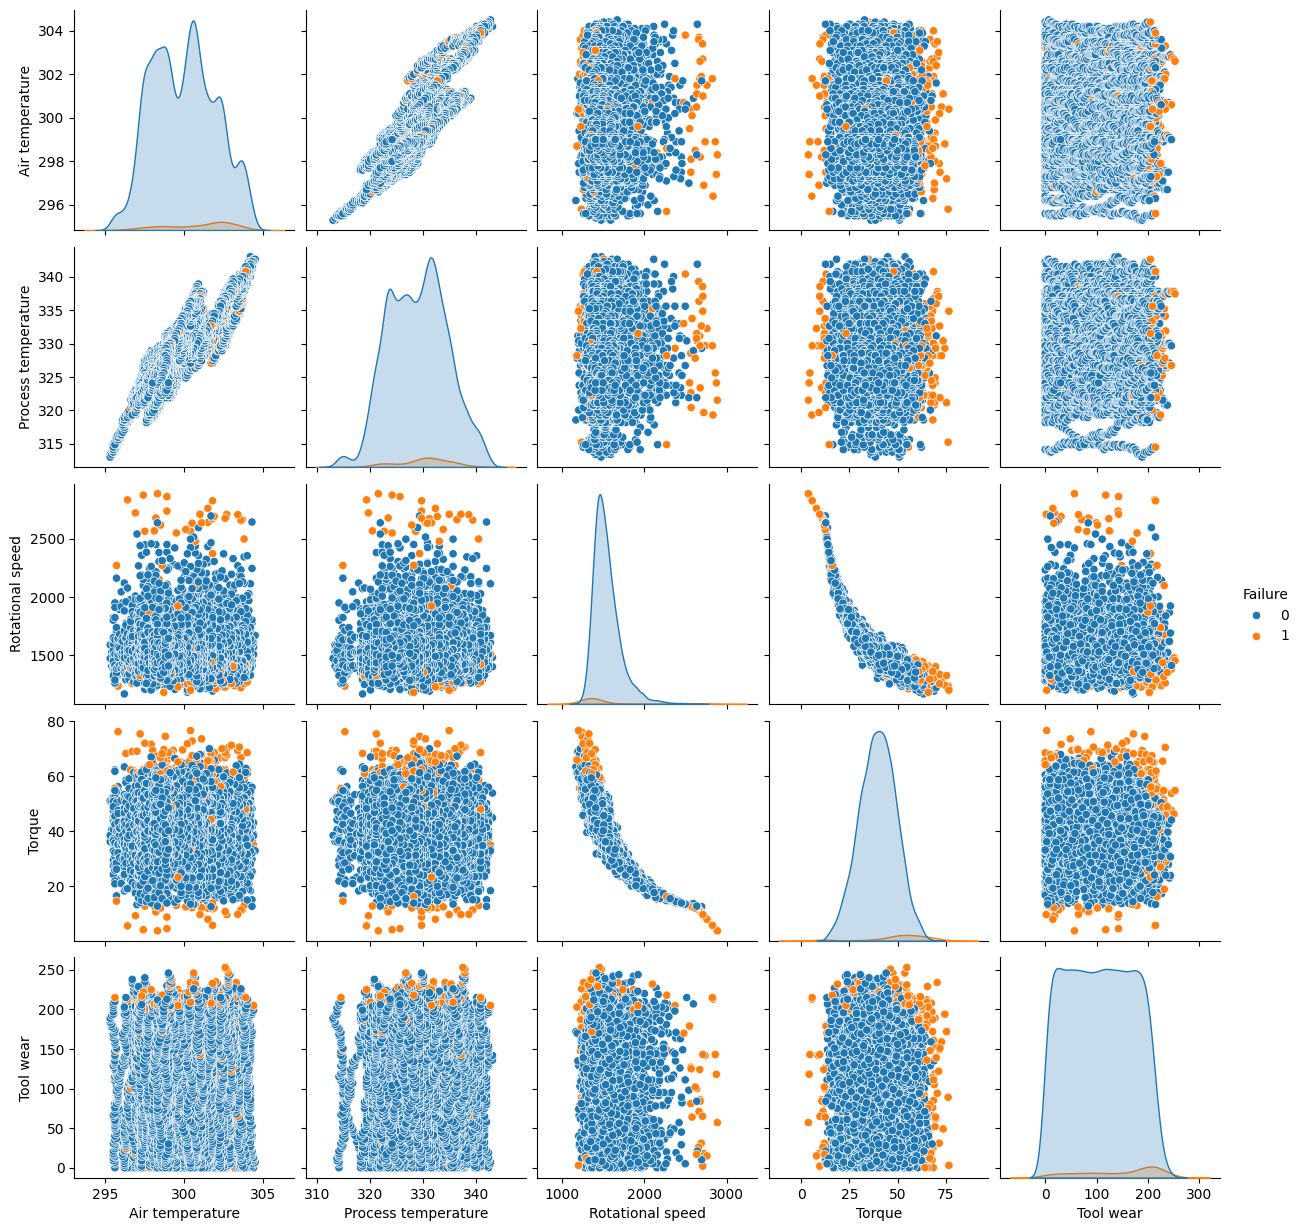

In [75]:
sns.pairplot(data, hue="Failure")

- The correlation between air temperature and process temperature and torque and rotational speed is visible here too

### To jump back to the EDA summary section, click <a href = #link2>here</a>.

___